125190.48283988421
122072.71291658774
119035.5599961244
116076.93951878982
113194.8208265528
110387.22576928842
107652.22734705058
104987.94838745201
102392.56025724387
99864.28160721129
97401.3771495223
95002.156466692
92664.97285134376
90388.22217597156
88170.34179192739
86009.80945687839
83905.14228999702
81854.89575416796
79857.66266451223
77912.07222254862
76016.7890753296
74170.51239890537
72371.97500548746
70619.94247369895
68913.21230131431
67250.61307990729
65631.00369084034
64053.272522044106
62516.33670504875
61019.14137174404
59560.658930357604
58139.88836015503
56755.85452437683
55407.607500941536
54094.221930455045
52814.796381078915
51568.45272982167
50354.33555982827
49171.61157325444
48019.469019322394
46897.11713716593
45803.78561308191
44738.724051816185
43701.2014615206
42690.50575202783
41705.94324609959
40746.83820331286
39812.532356257165
38902.38445872471
38015.769845583294
37152.08000402965
36310.72215592941
35491.11885095654
34692.70757025326
33914.94034033841

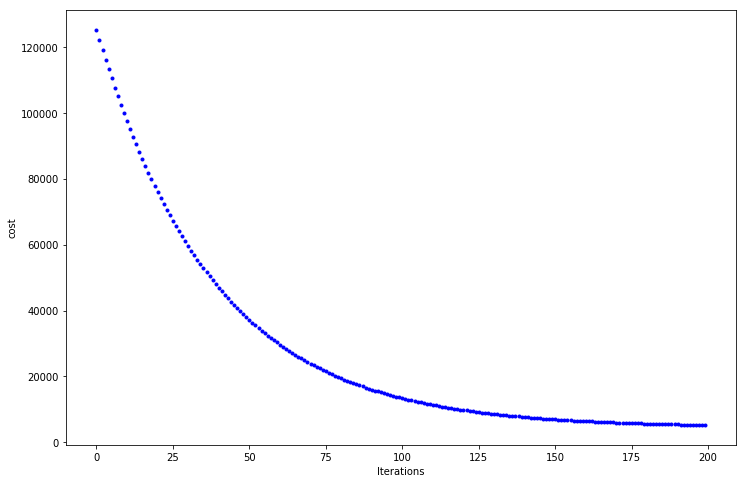

In [209]:
import numpy as np
import matplotlib.pyplot as plt

#Implementing Gradient Descent


#Generating random data
X = np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1) 


def cost(th, X, y):
    
    #Number of observations
    m = len(y)
    
    #Multiply parameters per actual values
    predictions =  X.dot(th)
        
    #Calculating the cost for the predictions against the y
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


def gradient_descent(X, y, th, l_r = 0.01, n_iterations = 200):
    
    #Number of observations
    m = len(y)
    
    cost_history = np.zeros(n_iterations)
    th_history = np.zeros((n_iterations, len(th)))
    
    for i in range(n_iterations):
        
        prediction = np.dot(X, th)
        th = th - (1/m)*l_r*(X.T.dot((prediction - y)))
        
        th_history[i,:] = th.T
        cost_history[i] = cost(th, X, y)

        
    return th, cost_history, th_history, n_iterations


#adding bias (column of 1's) to be able of multiply the matrix, since we have two parameters to optimize and just one X
X_bias = np.c_[np.ones((len(X),1)),X]

th = np.random.randn(X_bias.shape[1], 1)
th_r, c_h_r, th_h, n_iterations = gradient_descent(X_bias, y, th)


fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')

_=ax.plot(range(n_iterations),c_h_r,'b.')


    
    

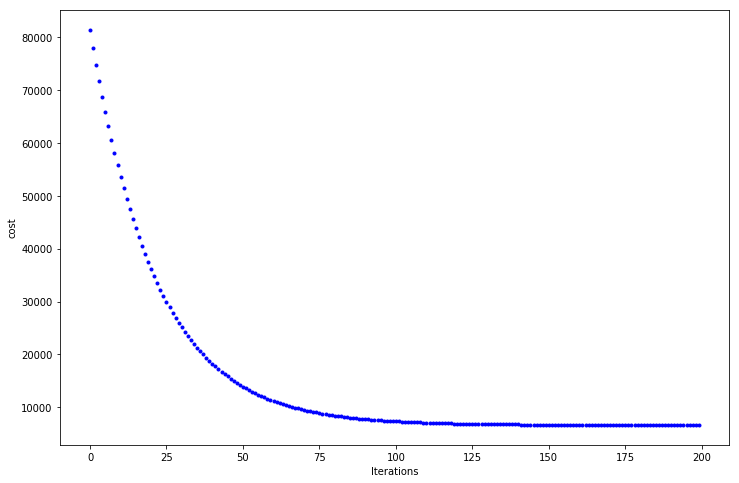

In [213]:
import numpy as np
import matplotlib.pyplot as plt

#Implementing Gradient Descent


#Generating random data
X = np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1) 


def cost(th, X, y):
    
    #Number of observations
    m = len(y)
    
    #Multiply parameters per actual values
    predictions =  X.dot(th)
        
    #Calculating the cost for the predictions against the y
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


def stochastic_gradient_descent(X, y, th, l_r = 0.01, iterations = 200):
    
    #Number of observations
    m = len(y)
    
    cost_history = np.zeros(iterations)
    th_history = np.zeros((iterations, len(th)))
    
    #Creating random indexes iter them, since SGD goes observation by observation
    
    random_indexes = [i for i in range(len(X))]
    np.random.shuffle(random_indexes)
    
    
    
    #Changing matrix operations by single number operations
    for i in range(iterations):
        for j in random_indexes:
            #prediction = np.dot(X, th)
            prediction = X[j][0] * th[0] + X[j][1] * th[1]
            
            #th = th - (1/m)*l_r*(X.T.dot((prediction - y)))
            calc = (1/m)*l_r*(X[j][0]*((prediction - y[j]))) + (1/m)*l_r*(X[j][1]*((prediction - y[j])))
            th = th - calc
        th_history[i,:] = th.T
        
        cost_history[i] = cost(th, X, y)
        
        
    return th, cost_history, th_history


#adding bias (column of 1's) to be able of multiply the matrix, since we have two parameters to optimize and just one X
#X_b = np.c_[np.ones((len(X),1)),X]




X_b = np.c_[np.ones((len(X),1)), X]


th = np.random.randn(2, 1)
th_r, c_h_r, th_h = stochastic_gradient_descent(X_b, y, th)


fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')

_=ax.plot(range(200),c_h_r,'b.')


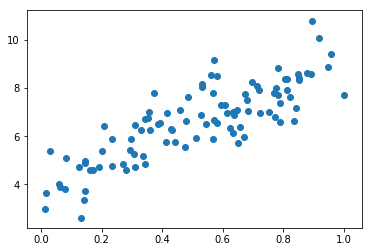

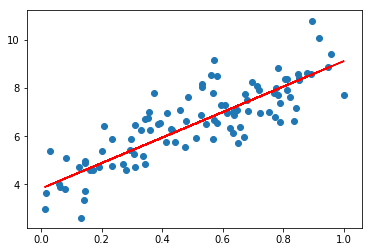

<Figure size 432x288 with 0 Axes>

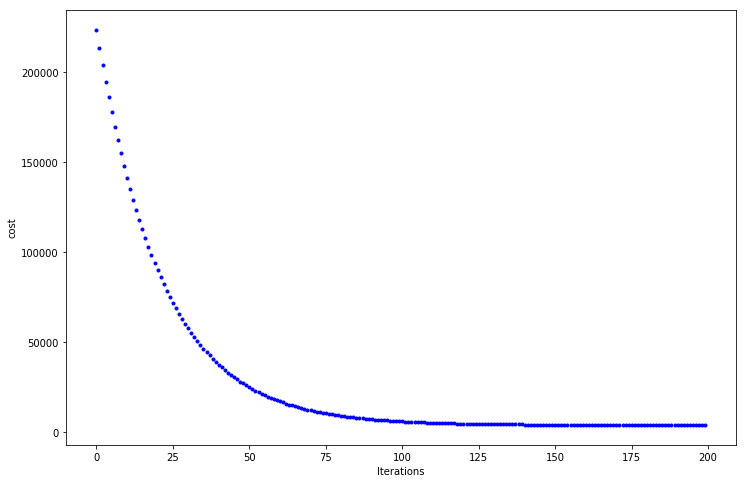

In [7]:
#Testing the SGD with LSLR

#Generating random data, dataset to solve LSLR problem

X = np.random.rand(100,1)
y = 4+5*X+np.random.randn(100,1) 

#Plotting dataset

fig = plt.figure()
plt.scatter(X,y)
plt.show()



#We add bias because we just have one column of X and we need to find two parameters

X_b = np.c_[np.ones((len(X),1)), X]

#Generating two theta parameters randomly

th = np.random.randn(2, 1)
# Applying gradient descent to obtain the parameter for when the cost is minimum 
# mean square error is the cost function we are using

th_r, c_h_r, th_h = stochastic_gradient_descent(X_b, y, th)

# Obtaining the last value of the theta history, it's when the thetas are the maximum optimized

last_th = th_h[-1]

# Ploting the line with the parameters we have found

fig = plt.figure()

plt.scatter(X,y)
plt.plot(X, last_th[0] + last_th[1]*X, 'r' )
plt.show()

fig = plt.figure()
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')

_=ax.plot(range(200),c_h_r,'b.')

plt.show()


In [8]:
# Testing implementation on real dataset

import pandas as pd 

# Importing dataset
df = pd.read_excel('Folds5x2_pp.xlsx')
print(df.head())
print(df.info())



      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None


In [267]:
def cost_scalable(th, X, y):
    
    #Number of observations
    m = len(y)
    
    #Multiply parameters per actual values
    predictions =  X.dot(th)
    
    #Calculating the cost for the predictions against the y
    cost =  (np.sum(np.square(predictions-y))) / (2*m)
    return cost



# Creating a stochastic_gradient_descent scalable not just for two thetas

def stochastic_gradient_descent_scalable(X, y, th, l_r = 0.01, n_iterations = 200):
    
    #Number of observations
    m = len(y)
    
    cost_history = np.zeros(n_iterations)
    th_history = np.zeros((n_iterations, len(th)))
    
    #Creating random indexes iter them, since SGD goes observation by observation
    
    random_indexes = [i for i in range(len(X))]
    np.random.shuffle(random_indexes)
    
    prediction = 0
    calc = 0
    #Changing matrix operations by single number operations
    for i in range(n_iterations):
        print('iter' + str(i))
        for j in random_indexes:
            for z in range(len(th)):
                #prediction = np.dot(X, th)
                prediction += X[j][z] * th[z]
                #th = th - (1/m)*l_r*(X.T.dot((prediction - y)))
                calc += (1/m)*l_r*(X[j][z]*((prediction - y[j])))
                
                th[z] = th[z] - calc
            
            
            prediction = 0
            calc = 0
        cost_history[i] = cost_scalable(th, X, y)
        th_history[i,:] = th.T
        
            
    return th, cost_history, th_history, n_iterations


iter0
iter1
iter2
iter3
iter4
iter5
iter6
iter7
iter8
iter9
iter10
iter11
iter12
iter13
iter14
iter15
iter16
iter17
iter18
iter19
iter20
iter21
iter22
iter23
iter24
iter25
iter26
iter27
iter28
iter29
iter30
iter31
iter32
iter33
iter34
iter35
iter36
iter37
iter38
iter39
iter40
iter41
iter42
iter43
iter44
iter45
iter46
iter47
iter48
iter49
iter50
iter51
iter52
iter53
iter54
iter55
iter56
iter57
iter58
iter59
iter60
iter61
iter62
iter63
iter64
iter65
iter66
iter67
iter68
iter69
iter70
iter71
iter72
iter73
iter74
iter75
iter76
iter77
iter78
iter79
iter80
iter81
iter82
iter83
iter84
iter85
iter86
iter87
iter88
iter89
iter90
iter91
iter92
iter93
iter94
iter95
iter96
iter97
iter98
iter99
iter100
iter101
iter102
iter103
iter104
iter105
iter106
iter107
iter108
iter109
iter110
iter111
iter112
iter113
iter114
iter115
iter116
iter117
iter118
iter119
iter120
iter121
iter122
iter123
iter124
iter125
iter126
iter127
iter128
iter129
iter130
iter131
iter132
iter133
iter134
iter135
iter136
iter137
iter13

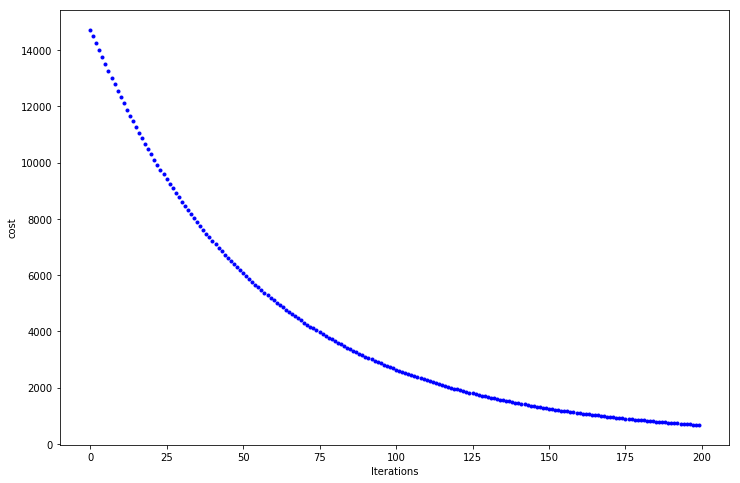

In [268]:
# Adding all columns except the last one to X and the las one to Y, since is the value to predict

X = df.loc[:, df.columns != df.columns[-1]]
y = df.iloc[:,-1]


# Changing from pandas series to numpy array
y = y.to_numpy()
y = y.reshape((y.shape[0], 1))

# We add bias because we need len(Xcolumns) + 1 to find all the parameters
X_b = np.c_[np.ones((len(X),1)), X]

# Generating theta parameters randomly
th = np.random.randn(X_b.shape[1], 1)

# # Applying gradient descent to obtain the parameter for when the cost is minimum 
# # mean square error is the cost function we are using
th_r, c_h_r, th_h, n_iterations = stochastic_gradient_descent_scalable(X_b, y, th)



print(get_mae(X, y, th_h[-1]))

fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')

_=ax.plot(range(n_iterations),c_h_r,'b.')




In [273]:
def cost_ridge(th, X, y, alpha):
    
    #Number of observations
    m = len(y)
    
    #Multiply parameters per actual values
    predictions =  X.dot(th)
    
    #Calculating the cost for the predictions against the y
    cost = (np.sum(np.square(predictions-y))) / (2*m) + alpha * np.dot(th.T, th)
    return cost



# Creating a stochastic_gradient_descent scalable not just for two thetas

def stochastic_gradient_descent_ridge(X, y, th, l_r = 0.01, n_iterations = 150, alpha = 0.01):
    
    #Number of observations
    m = len(y)
    
    cost_history = np.zeros(n_iterations)
    th_history = np.zeros((n_iterations, len(th)))
    
    #Creating random indexes iter them, since SGD goes observation by observation
    
    random_indexes = [i for i in range(len(X))]
    np.random.shuffle(random_indexes)
    
    prediction = 0
    calc = 0
    #Changing matrix operations by single number operations
    for i in range(n_iterations):
        for j in random_indexes:
            for z in range(len(th)):
                #prediction = np.dot(X, th)
                prediction += X[j][z] * th[z]
                #th = th - (1/m)*l_r*(X.T.dot((prediction - y)))
                calc += (1/m)*l_r*(X[j][z]*((prediction - y[j])) + alpha * th[z]) 
                
                
                th[z] = th[z] - calc 
            
            prediction = 0
            calc = 0
        
        th_history[i,:] = th.T
        cost_history[i] = cost_ridge(th, X, y, alpha)
        
    return th, cost_history, th_history, n_iterations


91.64119738921917


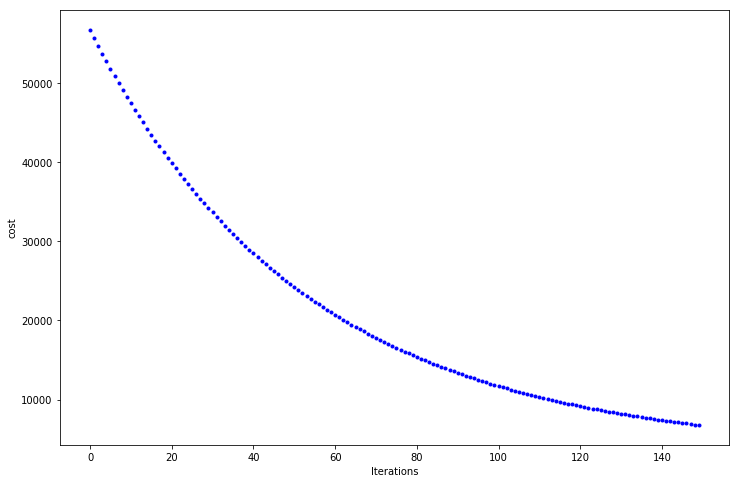

In [274]:
# Adding all columns except the last one to X and the las one to Y, since is the value to predict

X = df.loc[:, df.columns != df.columns[-1]]
y = df.iloc[:,-1]


# Changing from pandas series to numpy array
y = y.to_numpy()
y = y.reshape((y.shape[0], 1))

# We add bias because we need len(Xcolumns) + 1 to find all the parameters
X_b = np.c_[np.ones((len(X),1)), X]



# Generating theta parameters randomly
th = np.random.randn(X_b.shape[1], 1)




    
# # Applying gradient descent to obtain the parameter for when the cost is minimum 
# # mean square error is the cost function we are using
th_r, c_h_r, th_h, n_iterations = stochastic_gradient_descent_ridge(X_b, y, th)

print(get_mae(X, y, th_h[-1]))


fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')

_=ax.plot(range(n_iterations),c_h_r,'b.')






In [259]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def get_mae(X, y, thetas):
    y_pred = []
    y_true = y
    x_true = X
    calc=0
    for i in range(len(x_true)):
        for j in range(len(thetas)-1):
            calc += x_true.iloc[i][j] * thetas[j+1]
        y_pred.append(thetas[0] + calc)
        calc = 0

    y_true_list = []
    y_true_list = [y[0] for y in y_true]
    
    return(mean_absolute_error(y_true_list, y_pred))


In [251]:
#Using Python libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

model_lsrl = LinearRegression()  
model_lsrl.fit(X, y)
y_pred = model_lsrl.predict(X)

print(mean_absolute_error(y,y_pred))
print(model_lsrl.coef_)

model_ridge = Ridge(alpha=0.01)
model_ridge.fit(X, y)
y_pred = model2.predict(X)

print(mean_absolute_error(y,y_pred))
print(model_ridge.coef_)

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X, y)
y_pred = model_lasso.predict(X)

print(mean_absolute_error(y,y_pred))
print(model_lasso.coef_)

model_ElasticNet = ElasticNet(alpha=0.01)
model_ElasticNet.fit(X, y)
y_pred = model_ElasticNet.predict(X)

print(mean_absolute_error(y,y_pred))
print(model_ElasticNet.coef_)

3.6252158076011827
[[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]]
3.625215828252232
[[-1.97751289 -0.2339165   0.062083   -0.15805407]]
3.6251819870072093
[-1.97759114 -0.23387493  0.06178112 -0.1580053 ]
3.6252635327451217
[-1.97684926 -0.23417068  0.06210232 -0.15791298]
